# Importing Libraries

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

# Test set Image Processing

In [2]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 1358 files belonging to 4 classes.
['Powdery Mildew', 'bactrial blight', 'healthy', 'leaf spot']


# Loading Model

In [3]:
cnn = tf.keras.models.load_model('trained_plant_disease_model.keras')

#Visualising and Performing Prediction on Single image

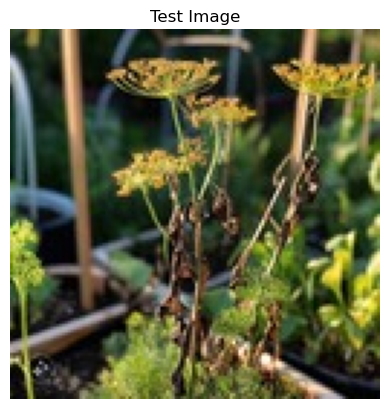

In [4]:
#Test Image Visualization
import cv2
image_path = 'test/test/IMG-20240519-WA0086.JPG'

# Read the image using OpenCV
img = cv2.imread(image_path)

# Check if the image was loaded successfully
if img is None:
    print("Failed to load image. Please check the file path.")
else:
    # Convert the image from BGR (OpenCV default) to RGB (for displaying correctly with Matplotlib)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display the image using Matplotlib
    plt.imshow(img_rgb)
    plt.title('Test Image')
    plt.axis('off')  # Hide the axis
    plt.show()

## Testing Model

In [5]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


In [6]:
print(predictions)

[[0.03900686 0.7148855  0.0065756  0.23953198]]


In [7]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

1


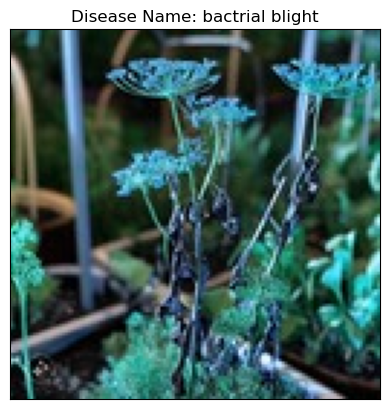

In [8]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()